In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Load Data

In [2]:
ultimate_file = "ultimate_data_challenge.json"
df = pd.read_json(ultimate_file)

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


# Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Handle null rows in phone, avg_rating_by_driver ,avg_rating_of_driver

In [4]:
df.phone.fillna("other", inplace=True)
df.avg_rating_by_driver.fillna(np.mean(df.avg_rating_by_driver), inplace=True)
df.avg_rating_of_driver.fillna(np.mean(df.avg_rating_of_driver), inplace=True)

#### convert signup_date , last_trip_date columns to datetime Type

In [5]:
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [7]:
df.last_trip_date.describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

# Feature Selection

#### Create 'retained' drivers coloumn : 
###### Determine whether or not a user will be active in their 6th month on the system, that means user's the last trip date is between 1st June to 1st July. Since, the last date in the dataset is 1st July, we can simply put that month is 6 or 7

In [8]:
df['retained'] = (df['last_trip_date'].dt.month >= 6).astype('int')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [9]:
print("retained drivers : " + str(len(df.loc[df.retained == 1])) )
print("Total drivers : " + str(len(df)) )

retained drivers : 18804
Total drivers : 50000


# Question 1:
 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?   

Answer : from the above 37.608 percent of drivers are retained

# EDA

In [10]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [11]:
df.phone.unique()

array(['iPhone', 'Android', 'other'], dtype=object)

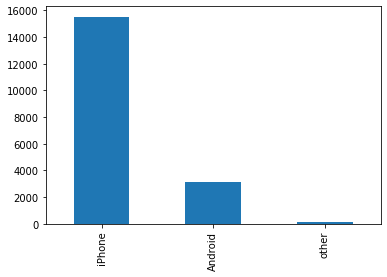

In [12]:
df[df.retained == 1]['phone'].value_counts().plot(kind='bar')
plt.show()

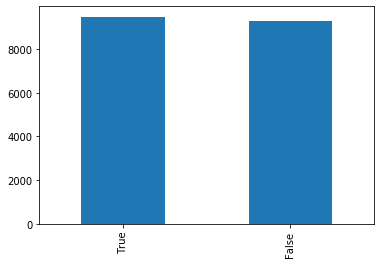

In [13]:
df[df.retained == 1]['ultimate_black_user'].value_counts().plot(kind='bar')
plt.show()

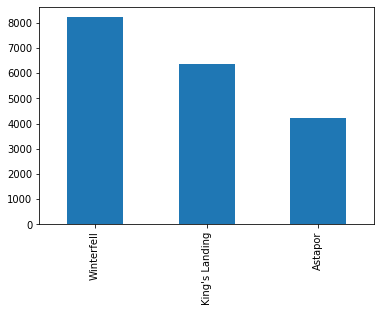

In [14]:
df[df.retained == 1]['city'].value_counts().plot(kind='bar')
plt.show()

Inference from above graphs : 
    1. More "iPhone" users are retained.
    2. More retained users come from "Winterfell"

# Feature Importance

### Lets see Correlation Matrix .

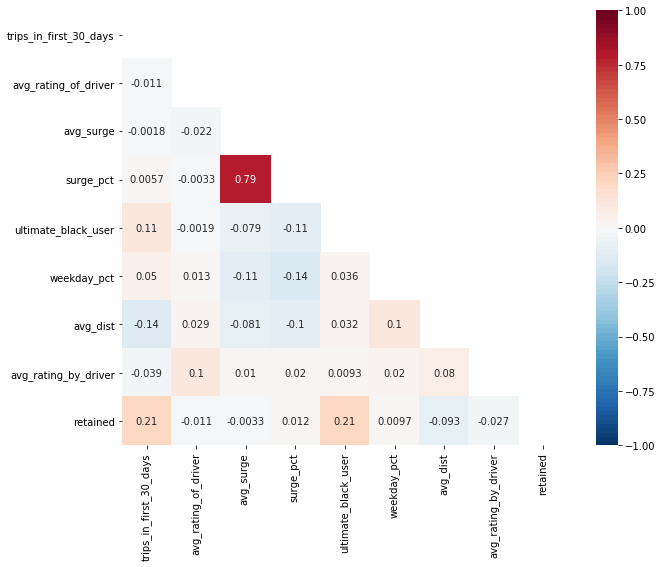

In [15]:
plt.figure(figsize=(10,8))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap=sns.color_palette("RdBu_r", 100),mask=mask)

### Covert categorical Coloumns to numerical

In [16]:
df["city"] = df["city"].astype('category')
df["city_cat"] = df["city"].cat.codes
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_cat
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,2


In [17]:
df["ultimate_black_user"] = df["ultimate_black_user"].astype('category')
df["ultimate_black_user_cat"] = df["ultimate_black_user"].cat.codes
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_cat,ultimate_black_user_cat
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,2,0


In [18]:
df["phone"] = df["phone"].astype('category')
df["phone_cat"] = df["phone"].cat.codes
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_cat,ultimate_black_user_cat,phone_cat
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,2,0,0


### High performing Features

Feature ranking:
1. feature 5 (0.30)
2. feature 4 (0.13)
3. feature 6 (0.11)
4. feature 3 (0.09)
5. feature 1 (0.08)
6. feature 0 (0.08)
7. feature 2 (0.07)
8. feature 7 (0.07)
9. feature 9 (0.04)
10. feature 8 (0.03)


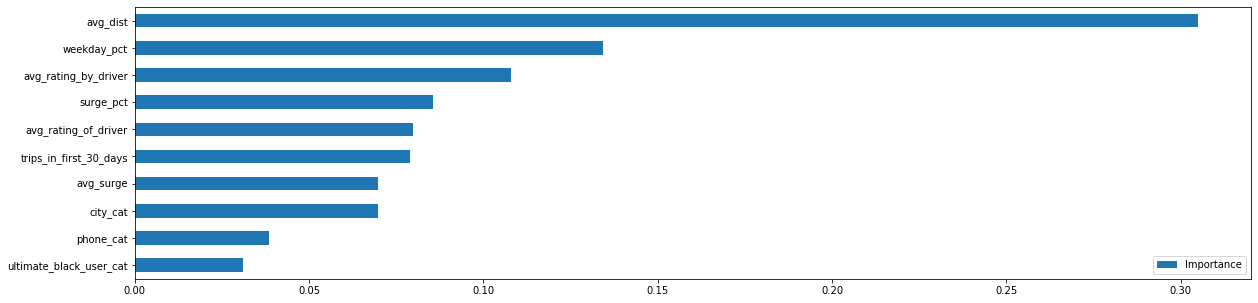

In [19]:
X = df.drop(['retained','phone','city','ultimate_black_user','signup_date','last_trip_date'], axis=1)
y = df.retained

from sklearn.ensemble import RandomForestClassifier

# Using Random Forest to gain an insight on Feature Importance
rfclf = RandomForestClassifier()
rfclf.fit(X, y)

importances = rfclf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (f + 1, indices[f], importances[indices[f]]))

df_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
df_importances.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

In the feature importance analysis, we can find the important features affecting on the target variable of retained users .

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● weekday_pct: the percent of the user’s trips occurring during a weekday

● avg_rating_by_driver: the rider’s average rating over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● avg_surge: The average surge multiplier over all of this user’s trips

● city: city this user signed up in

● phone: primary device for this user

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days FALSE otherwise

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

# Predictive Model

### Approach:

> Will divide the data into train and test <br>
> Will Create models using KNN , Random Forest and Logistic Regression. <br>
> Will Tune Hyper Parameters for each of these models <br>
> Will build an ensemble model using best params obatained above and predict the retained.

In [20]:
# imports

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

### Test Train Split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y)

In [22]:
# knn

knn = KNeighborsClassifier()

params_knn = {'n_neighbors': np.arange(20, 30)}

knn_gs = GridSearchCV(knn, params_knn, cv=5)

knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
knn_best = knn_gs.best_estimator_
print("Best Estimator : {1}", knn_gs.best_estimator_)
print("Best Params : {1}", knn_gs.best_params_)
print("Best Score : {1}", knn_gs.best_score_)

Best Estimator : {1} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')
Best Params : {1} {'n_neighbors': 23}
Best Score : {1} 0.7547428571428572


In [24]:
# random forest classifier

rf = RandomForestClassifier()

params_rf = {'n_estimators': [200, 300, 400]}

rf_gs = GridSearchCV(rf, params_rf, cv=5)

rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [25]:
rf_best = rf_gs.best_estimator_
print("Best Estimator : {1}", rf_gs.best_estimator_)
print("Best Params : {1}", rf_gs.best_params_)
print("Best Score : {1}", rf_gs.best_score_)

Best Estimator : {1} RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Params : {1} {'n_estimators': 400}
Best Score : {1} 0.7558


In [26]:
# Logistic Regression

lr = LogisticRegression()

lr.fit(X_train,y_train)

C:\Users\SAKH.ORADEV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#Best Scores :

print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(lr.score(X_test, y_test)))

knn: 0.7522666666666666
rf: 0.7521333333333333
log_reg: 0.6860666666666667


In [28]:
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', lr)]

ensemble = VotingClassifier(estimators,voting='hard')

ensemble.fit(X_train, y_train)

ensemble.score(X_test, y_test)

C:\Users\SAKH.ORADEV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7654

# Question : 2
Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

Answer :
From the model results obtained above,the best accuracy in the ensemble, VotingClassifier model (Accuracy : 77.05 (varies on running multiple times)).
The accuracy can be improved using more rich data and features.
Ensemble model performed better than our individual k-NN, random forest and logistic regression models!

In the feature correlation, we have drawn the heat map and found that there are strong correlation between surge percent and average surge.
Below are the features in the order of importance.

> avg_dist: the average distance in miles per trip taken in the first 30 days after signup <br>
> weekday_pct: the percent of the user’s trips occurring during a weekday <br>
> avg_rating_by_driver: the rider’s average rating over all of their trips <br>
> surge_pct: the percent of trips taken with surge multiplier > 1 <br>
> avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips <br>
> trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up <br>
> avg_surge: The average surge multiplier over all of this user’s trips <br>
> city: city this user signed up in <br>
> phone: primary device for this user <br>
> ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days FALSE otherwise <br>
> signup_date: date of account registration; in the form ‘YYYY MM DD’ <br>
> last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’ <br>

# Question:3
Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

> Based on feature analysis, Encourage riders to get more "average distance in miles per trip taken in the first 30 days after signup" 
and " the percent of the user’s trips occurring during a weekday" , by providing addtional incentives like discounts , coupons, etc. <br>

> Provide incentives like discounts , coupons, etc. to the good riders, those rated high by the drivers. <br>

> Retain good drivers , those rated high by riders by providing addtional bonuses or something similar. <br>